## FINAL PROJECT

### Group 3.


1.Lynn Achieng

2.Josephine Maro

3.Edmund Nyaribo

4.Troye Gilbert

5.Pascalia Maiga




## E-Commerce Recommender System

## 1. Business Understanding

### 1.1 Overview


In today's digital age, many activities are conducted online with the click of a button, whether it's shopping, communicating, playing games, or working. Online shopping platforms like Amazon, Jumia, Kilimall, and Jiji have revolutionized the way consumers purchase goods. They offer a vast array of products—from groceries and electronics to kitchenware and home appliances—delivered directly to consumers' doorsteps. However, the convenience of online shopping comes with its challenges. Consumers are often faced with an overwhelming number of choices, with numerous products from different manufacturers and sellers, each offering various functionalities and ratings. The abundance of options can lead to decision fatigue, where consumers spend a significant amount of time browsing before selecting a product that meets their needs. To enhance the shopping experience, increase customer satisfaction, and boost sales, there is a growing need for intelligent systems that can provide quick and personalized product, the recommender system, which uses sophisticated algorithms to suggest products tailored to individual user profiles. 

Traditional recommendation systems, such as collaborative filtering and content-based methods, each have their strengths and limitations. To overcome these limitations, hybrid recommender systems have emerged as a powerful solution. By combining multiple recommendation techniques, hybrid systems aim to deliver more accurate, relevant, and personalized recommendations. These systems leverage the strengths of each method to provide a comprehensive and nuanced understanding of user preferences. For example, a hybrid system might integrate collaborative filtering with content-based filtering, combining insights from user interactions with detailed product attributes to refine recommendations. The proposed hybrid recommender system aims to address the challenges of online shopping by providing users with quick and personalized product suggestions. By employing a combination of recommendation techniques, the system will enhance the shopping experience, reduce decision fatigue, and increase overall customer satisfaction. This approach not only benefits users by simplifying their decision-making process but also supports businesses in driving sales and improving customer engagement.      


### 1.2 Challenges

1. Volume of Choices:

   The primary challenge in online shopping is the vast number of available products. Consumers are often overwhelmed by the plethora of options, leading to extended browsing times and frustration. This challenge is exacerbated by decision fatigue, where the abundance of alternatives makes it difficult for users to promptly select the best option.
2. Complexity of Recommendation Algorithms:

   Developing effective recommendation algorithms is a significant challenge. Creating a system that accurately reflects individual user preferences requires sophisticated algorithms capable of understanding and predicting user needs. The diversity of products and the variability in user preferences make this task even more complex.
3. User Experience: 

   Ensuring a seamless and user-friendly interaction with the chatbot and recommender system is crucial. Users expect a smooth, intuitive interface when engaging with chatbot and recommender system, and any friction in this interaction can lead to dissatisfaction and reduced effectiveness of the tool.


### 1.3 Proposed Solution

The goal is to develop a chatbot and a recommender system that interacts with users, understands their product requirements, and suggests suitable products based on given specifications. The chatbot will leverage natural language processing (NLP) and machine learning algorithms to provide accurate and personalized recommendations in response to user queries.
Here's how the proposed solution will work:
1. User Interaction: 

   The chatbot and the recommender system will engage users through a conversational interface, allowing them to specify their product requirements and preferences. By understanding user input in natural language, the chatbot and the recommender system can interpret needs more accurately, translating these into actionable queries to retrieve relevant product recommendations.
2. Recommendation Engine:

   The core for the chatbot and the recommender system will be its recommendation engine, powered by machine learning algorithms. These algorithms will analyze user inputs, historical data, and product features to generate tailored recommendations. The engine will consider factors such as user preferences, past interactions, and current trends to deliver suggestions that align closely with the user’s specific needs.
3. Continuous Learning:  

   The chatbot and the recommender system will be designed to learn from user interactions over time, improving its recommendations as it gathers more data about user preferences and behaviors. This iterative learning process will help the chatbot provide increasingly accurate and relevant recommendations, making it more effective and valuable to users.


## 2. Metrics of Success

Recommendation Accuracy:

  Percentage of correct recommendations based on user feedback. This will be a key indicator of effectiveness of the chatbot and the recommender system in understanding and meeting user needs.

User Satisfaction:

  Measured through user feedback, satisfaction surveys, and ratings. High user satisfaction will reflect the success of the chatbot and recommender system in enhancing the shopping experience.

Response Time: 

  Average time taken by the chatbot and recommender system to respond to user queries. Quick response times are crucial for maintaining user engagement and satisfaction.

Engagement Rate: 

  Number of interactions per user and frequency of use. A high engagement rate indicates that users find value in the chatbot and are likely to return.
Conversion Rate:


  Percentage of users who make a purchase based on the recommendation from chatbot and recommender system. This metric will directly measure their impact on sales.


 ## 3. Conclusion

Creating a chatbot that provides product recommendations based on user specifications addresses the need for quick and personalized shopping assistance. By leveraging NLP and machine learning, the chatbot can enhance the user experience, drive customer satisfaction, and increase sales. Continuous learning and adaptation to market dynamics will ensure that the chatbot remains effective and relevant in a rapidly changing online marketplace

## 4. Problem Statement

Consumers often struggle to find the right product that meets their specific needs due to the vast array of options available. This can lead to decision fatigue and dissatisfaction with the online shopping experience. There is a need for a system that can assist users by providing personalized product suggestions based on their unique specifications. Decision fatigue can result in a negative shopping experience, characterized by prolonged search times, increased dissatisfaction, and potentially missed opportunities for making purchases. In addition, the complexity of product options makes it difficult for users to make well-informed decisions without assistance. They need a system that can quickly sift through the myriad of choices and present them with options that align closely with their preferences and requirements.

To address these issues, there is a pressing need for a more sophisticated recommendation system that can integrate multiple techniques to provide accurate and personalized product suggestions. Such a system would not only improve the efficiency of the shopping process but also enhance user satisfaction by delivering recommendations that are tailored to individual preferences and needs. The problem, therefore, is to develop a hybrid recommender system that combines various recommendation techniques to offer users a seamless and personalized shopping experience. This system must effectively handle the complexity of product options and user preferences, reduce decision fatigue, and ultimately lead to increased customer satisfaction and sales for businesses. By addressing these challenges, the hybrid recommender system will enhance the overall quality of online shopping and support both consumers and retailers in navigating the digital marketplace more effectively.

## 5. Objectives

1. Develop a chatbot that provides accurate and relevant product recommendations.

2. Create an algorithm that matches user specifications with suitable products.

3. Ensure the chatbot is user-friendly and intuitive to enhance user experience.

4. Conduct Exploratory Data Analysis (EDA) to understand user behavior and product attributes

5. Iterate on the system based on continuous learning and data-driven insights.
 


## 6. Data Preparation.

In [2]:
# Loading the imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [3]:
# Loading the data
df = pd.read_csv('./FlikartProductSales.csv')
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/x...
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/k...
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...,https://rukminim1.flixcart.com/image/612/612/j...
...,...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...,https://rukminim1.flixcart.com/image/612/612/k...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...,https://rukminim1.flixcart.com/image/612/612/k...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...,https://rukminim1.flixcart.com/image/612/612/j...


In [4]:
df.shape

(12041, 12)

In [5]:
df.dtypes

category_1         object
category_2         object
category_3         object
title              object
product_rating    float64
selling_price      object
mrp                object
seller_name        object
seller_rating     float64
description        object
highlights         object
image_links        object
dtype: object

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
 11  image_links     12041 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [7]:
df.describe()

,product_rating,seller_rating
count,11961.000000,11827.000000
mean,4.061617,4.394538
std,0.345575,0.404288
min,1.000000,3.000000
25%,3.900000,4.100000
50%,4.100000,4.400000
75%,4.300000,4.700000
max,5.000000,5.000000


In [8]:
df.columns

Index(['category_1', 'category_2', 'category_3', 'title', 'product_rating',
       'selling_price', 'mrp', 'seller_name', 'seller_rating', 'description',
       'highlights', 'image_links'],
      dtype='object')

In [9]:
# Dropping the unnecessary columns
df.drop(['image_links'],axis=1,inplace=True)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [10]:
# Checking null values
df.isnull().sum()

category_1           0
category_2           0
category_3           0
title               18
product_rating      80
selling_price       28
mrp                375
seller_name        216
seller_rating      214
description       7020
highlights        5481
dtype: int64

In [11]:
# Inscpecting the title column
df[df['title'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,"Sports, Books and More",Industrial &Scientific tools,Packaging and Shipping Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,Electronics,Mobile Accessories,Screenguards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,Electronics,Smart Wearable Tech,Smart Watches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557,Men's wear,Bottom Wear,Casual Trousers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4516,Men's wear,Innerwear and loungewear,Night Suits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4664,Men's wear,Watches,Titan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776,Men's wear,Accessories,Backpacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4867,Men's wear,Accessories,Belts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Filling the null value with "other"
df['title'].fillna('Other',inplace=True)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [13]:
df.title.isnull().sum()

0

In [14]:
# Checking the Product Rating column
df[df['product_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,NaN,"₹2,710","₹4,476",NaN,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
681,"Sports, Books and More",Food Essentials,Chocolates,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,"Sports, Books and More",Food Essentials,Gifting Combos,HERBALIFE Weight Loss Combo pack Formula 1 + P...,NaN,"₹2,710","₹4,476",NaN,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
1438,"Sports, Books and More",Industrial &Scientific tools,Industrial Measurement Devices,DTTOOLS 25~50mm Micrometer Outside Screw Gauge...,NaN,₹889,"₹1,099",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11420,Home and Furniture,Home Improvement,Lawn and Gardening,Femily Organic STONE DUST powder for Plants Ma...,NaN,₹189,₹199,NaN,NaN,Calcium carbonate is used to help prevent the ...,"Manure, Potting Mixture, Fertilizer Used for A..."
11548,Home and Furniture,Home Décor,Clocks,BAREPEPE Digital Black Clock,NaN,NaN,NaN,NaN,NaN,NaN,Alarm Height x Width 100 mm x 160 mm Digital
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",NaN,"₹2,999","₹5,000",NaN,NaN,"White Table lamp for home,bedroom,living room,...","Color: White, Gold Power Source: AC Adapter W ..."
11817,Home and Furniture,Home Lighting,Ceiling Lamp,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Replacing Nulls with 0 
df['product_rating'].fillna('0',inplace=True)
df['product_rating'].isnull().sum()


0

In [16]:
# Inspecting the selling price column
df[df['selling_price'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
1578,"Sports, Books and More",Industrial &Scientific tools,Packaging and Shipping Products,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
1936,Electronics,Mobile Accessories,Screenguards,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
2156,Electronics,Smart Wearable Tech,Smart Watches,"alt OG Bluetooth Calling, 1.69"" HD Display wit...",4,NaN,NaN,NaN,NaN,With the amazing features of the alt OG smartw...,1.69� TFT LCD screen (240*280 px) Bluetooth ca...
2164,Electronics,Smart Wearable Tech,Smart Watches,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
2653,Electronics,Speakers,DTH Set Top Box,"Dish TV HD DTH, Hindi Family Saver Pack 1 Mont...",3,NaN,NaN,NaN,NaN,This offer includes DishTV HD set top box Conn...,NaN
3123,Men's wear,Foot Wear,Sneakers,BRUTON Lightweight Pack Of 1 Trendy Sneakers S...,3.7,NaN,NaN,NaN,NaN,NaN,NaN
3557,Men's wear,Bottom Wear,Casual Trousers,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
4516,Men's wear,Innerwear and loungewear,Night Suits,Other,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['selling_price'].fillna('0',inplace=True)
df['selling_price'].isnull().sum()

0

In [18]:
# M
df[df['mrp'].isnull()]
df['mrp'].fillna('0',inplace=True)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [19]:
columns_to_clean = ['selling_price', 'mrp']

# Remove the rupee sign and commas, then convert to numeric for each column
for column in columns_to_clean:
    df[column] = df[column].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Example conversion rate from INR to KES
conversion_rate = 0.76  

# Convert the Selling Price and Original Price from INR to KES
df['selling_price'] = df['selling_price'] * conversion_rate
df['mrp'] = df['mrp'] * conversion_rate
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,288.80,759.24,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,136.04,227.24,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,269.04,456.00,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,378.48,455.24,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [20]:
# Rename columns
df.rename(columns={
    'selling_price': 'selling_price(KSH.)',
    'mrp': 'mrp(KSH.)'
}, inplace=True)

In [21]:
# Inspecting the seller_name 
df[df['seller_name'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,description,highlights
40,"Sports, Books and More",Sports,Badminton,VICTOO SPORTS VICTOO PROFESIONAL BADMINTON Bad...,3.8,254.60,456.00,NaN,NaN,NaN,"Sport Type: Badminton Ideal For: Boys, Girls, ..."
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,0,0.00,0.00,NaN,NaN,NaN,NaN
600,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,OPEN SECRET Snacks Combo | Nutty Cookies and N...,2.7,345.80,0.00,NaN,NaN,Nutty Spread - Choco Almond TASTY & HEALTHY: T...,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,0,2059.60,3401.76,NaN,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
681,"Sports, Books and More",Food Essentials,Chocolates,Other,0,0.00,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",0,2279.24,3800.00,NaN,NaN,"White Table lamp for home,bedroom,living room,...","Color: White, Gold Power Source: AC Adapter W ..."
11817,Home and Furniture,Home Lighting,Ceiling Lamp,Other,0,0.00,0.00,NaN,NaN,NaN,NaN
11882,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,SHANKAR PERFUMEERY WORKS Combo Pack - Aromatic...,4.1,209.00,0.00,NaN,NaN,NaN,Type: Incense Sticks Fragrance: A fresh fragra...
11904,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,UNIBIC Season's Greetings|Christmas & New Year...,3.6,455.24,759.24,NaN,NaN,"Season's Greetings, Christmas & New Year Gift,...","Includes: Cake, Chocolate, Cookies Contents: 0..."


In [22]:
df['seller_name'].fillna('Null',inplace= True)
df['seller_name'].isnull().sum()

0

In [23]:
# Inspecting the selller_rating column
df[df['seller_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,description,highlights
40,"Sports, Books and More",Sports,Badminton,VICTOO SPORTS VICTOO PROFESIONAL BADMINTON Bad...,3.8,254.60,456.00,Null,NaN,NaN,"Sport Type: Badminton Ideal For: Boys, Girls, ..."
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,0,0.00,0.00,Null,NaN,NaN,NaN
600,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,OPEN SECRET Snacks Combo | Nutty Cookies and N...,2.7,345.80,0.00,Null,NaN,Nutty Spread - Choco Almond TASTY & HEALTHY: T...,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,0,2059.60,3401.76,Null,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
681,"Sports, Books and More",Food Essentials,Chocolates,Other,0,0.00,0.00,Null,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",0,2279.24,3800.00,Null,NaN,"White Table lamp for home,bedroom,living room,...","Color: White, Gold Power Source: AC Adapter W ..."
11817,Home and Furniture,Home Lighting,Ceiling Lamp,Other,0,0.00,0.00,Null,NaN,NaN,NaN
11882,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,SHANKAR PERFUMEERY WORKS Combo Pack - Aromatic...,4.1,209.00,0.00,Null,NaN,NaN,Type: Incense Sticks Fragrance: A fresh fragra...
11904,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,UNIBIC Season's Greetings|Christmas & New Year...,3.6,455.24,759.24,Null,NaN,"Season's Greetings, Christmas & New Year Gift,...","Includes: Cake, Chocolate, Cookies Contents: 0..."


In [24]:
df['seller_rating'].fillna('0',inplace=True)
df['seller_rating'].isnull().sum()

0

In [25]:
# Dropping columns not needed for the analysis
df.drop(['description'],axis=1,inplace=True)
df.drop(['highlights'],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           12041 non-null  object 
 1   category_2           12041 non-null  object 
 2   category_3           12041 non-null  object 
 3   title                12041 non-null  object 
 4   product_rating       12041 non-null  object 
 5   selling_price(KSH.)  12041 non-null  float64
 6   mrp(KSH.)            12041 non-null  float64
 7   seller_name          12041 non-null  object 
 8   seller_rating        12041 non-null  object 
dtypes: float64(2), object(7)
memory usage: 846.8+ KB


In [27]:
df2 = pd.read_csv('./Flipkart_Mobiles.csv')
df2

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [28]:
# Renaming columns for uniformity
df2 = df2.rename(columns={
    'Brand': 'Brand/Model',
    'Model': 'Model',
    'Color': 'Color',
    'Memory': 'Memory',
    'Storage': 'Storage',
    'Rating': 'product_rating',
    'Selling Price': 'selling_price(KSH.)',
    'Original Price': 'mrp(KSH.)'
})
df2

,Brand/Model,Model,Color,Memory,Storage,product_rating,selling_price(KSH.),mrp(KSH.)
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [29]:
df2 = pd.read_csv('./Flipkart_Mobiles.csv')
df2

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [30]:
df2.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

In [31]:
# Renaming columns for uniformity
df2 = df2.rename(columns={
    'Brand': 'Brand/Model',
    'Model': 'Model',
    'Color': 'Color',
    'Memory': 'Memory',
    'Storage': 'Storage',
    'Rating': 'product_rating',
    'Selling Price': 'selling_price(KSH.)',
    'Original Price': 'mrp(KSH.)'
})
df2

,Brand/Model,Model,Color,Memory,Storage,product_rating,selling_price(KSH.),mrp(KSH.)
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [32]:
# Adding placeholder columns to df2 to match df1
df2['category_1'] = 'Electronics'
df2['category_2'] = 'Mobiles'
df2['category_3'] = df2['Brand/Model'] + " " + df2['Model']
df2['title'] =  df2['Color'] + " " + df2['Memory'] + " " + df2['Storage'] + " " + df2['category_3']
df2['seller_name'] = 'Unknown'
df2['seller_rating'] = 0
df2['price_ratio'] = df2['selling_price(KSH.)'] / df2['mrp(KSH.)']
df2['price_difference'] = df2['mrp(KSH.)'] - df2['selling_price(KSH.)']
df2

,Brand/Model,Model,Color,Memory,Storage,product_rating,selling_price(KSH.),mrp(KSH.),category_1,category_2,category_3,title,seller_name,seller_rating,price_ratio,price_difference
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Moonlight Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Mint Cream 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Moonlight Black 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Mint Cream 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Electric Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,Electronics,Mobiles,SAMSUNG M52 5G,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.895954,2960
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.865032,4250
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,Electronics,Mobiles,SAMSUNG M52 5G,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0


In [33]:
df2.columns

Index(['Brand/Model', 'Model', 'Color', 'Memory', 'Storage', 'product_rating',
       'selling_price(KSH.)', 'mrp(KSH.)', 'category_1', 'category_2',
       'category_3', 'title', 'seller_name', 'seller_rating', 'price_ratio',
       'price_difference'],
      dtype='object')

In [34]:
# Columns to drop after joining them into title.
columns_to_drop = ['Brand/Model', 'Model', 'Color', 'Memory', 'Storage']
df2.drop(columns=columns_to_drop, inplace=True)
df2

,product_rating,selling_price(KSH.),mrp(KSH.),category_1,category_2,category_3,title,seller_name,seller_rating,price_ratio,price_difference
0,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Moonlight Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
1,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Mint Cream 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
2,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Moonlight Black 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
3,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Mint Cream 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
4,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Electric Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
...,...,...,...,...,...,...,...,...,...,...,...
3109,4.3,25990,25990,Electronics,Mobiles,SAMSUNG M52 5G,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0
3110,4.3,25489,28449,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.895954,2960
3111,4.3,27239,31489,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.865032,4250
3112,4.2,22989,22989,Electronics,Mobiles,SAMSUNG M52 5G,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0


In [35]:
# Extract the first name in the category_3 column
df2['category_3'] = df2['category_3'].apply(lambda x: x.split()[0])
df2

,product_rating,selling_price(KSH.),mrp(KSH.),category_1,category_2,category_3,title,seller_name,seller_rating,price_ratio,price_difference
0,4.5,11990,15990,Electronics,Mobiles,OPPO,Moonlight Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
1,4.5,11990,15990,Electronics,Mobiles,OPPO,Mint Cream 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
2,4.3,13990,17990,Electronics,Mobiles,OPPO,Moonlight Black 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
3,4.3,13990,17990,Electronics,Mobiles,OPPO,Mint Cream 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
4,4.5,11990,15990,Electronics,Mobiles,OPPO,Electric Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
...,...,...,...,...,...,...,...,...,...,...,...
3109,4.3,25990,25990,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0
3110,4.3,25489,28449,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.895954,2960
3111,4.3,27239,31489,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.865032,4250
3112,4.2,22989,22989,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_rating       2970 non-null   float64
 1   selling_price(KSH.)  3114 non-null   int64  
 2   mrp(KSH.)            3114 non-null   int64  
 3   category_1           3114 non-null   object 
 4   category_2           3114 non-null   object 
 5   category_3           3114 non-null   object 
 6   title                3032 non-null   object 
 7   seller_name          3114 non-null   object 
 8   seller_rating        3114 non-null   int64  
 9   price_ratio          3114 non-null   float64
 10  price_difference     3114 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 267.7+ KB


In [37]:
# Concatenate the dataframes
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,NaN
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,NaN,NaN
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,NaN
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,NaN
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.0
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,2960.0
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,4250.0
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.0


In [38]:
# Total number of missing values
total_missing = merged_df.isnull().sum().sum()

# Total number of values
total_values = merged_df.size

# Percentage of missing values
percentage_missing = (total_missing / total_values) * 100

print(f'Percentage of missing values: {percentage_missing:.2f}%')

Percentage of missing values: 14.58%


In [39]:
# Assuming df is your DataFrame
def calculate_missing_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    return missing_percentage

# Example usage
missing_percentage = calculate_missing_percentage(merged_df)
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
category_1              0.000000
category_2              0.000000
category_3              0.000000
title                   0.541076
product_rating          0.950181
selling_price(KSH.)     0.000000
mrp(KSH.)               0.000000
seller_name             0.000000
seller_rating           0.000000
price_ratio            79.452326
price_difference       79.452326
dtype: float64


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15155 non-null  object 
 1   category_2           15155 non-null  object 
 2   category_3           15155 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15011 non-null  object 
 5   selling_price(KSH.)  15155 non-null  float64
 6   mrp(KSH.)            15155 non-null  float64
 7   seller_name          15155 non-null  object 
 8   seller_rating        15155 non-null  object 
 9   price_ratio          3114 non-null   float64
 10  price_difference     3114 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.3+ MB


In [41]:
# Assuming df is your DataFrame
def calculate_missing_percentage(merged_df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    return missing_percentage

# Example usage
missing_percentage = calculate_missing_percentage(merged_df)
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
category_1             0.0
category_2             0.0
category_3             0.0
title                  0.0
product_rating         0.0
selling_price(KSH.)    0.0
mrp(KSH.)              0.0
seller_name            0.0
seller_rating          0.0
dtype: float64


In [42]:
# Replace missing data with 'Unknown'
merged_df= merged_df.dropna(subset=['title'])
merged_df['title'].isnull().sum()

0

In [43]:
merged_df[merged_df['product_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
12078,Electronics,Mobiles,OPPO,Pearl Blue 4 GB 64 GB OPPO A16,NaN,13850.0,13850.0,Unknown,0,1.000000,0.0
12082,Electronics,Mobiles,OPPO,CRYSTAL BLACK 4 GB 64 GB OPPO A16,NaN,13990.0,15990.0,Unknown,0,0.874922,2000.0
12169,Electronics,Mobiles,OPPO,Crystal Black 4 GB 64 GB OPPO A16,NaN,13490.0,13490.0,Unknown,0,1.000000,0.0
12186,Electronics,Mobiles,OPPO,Glowing Gold 6 GB 128 GB OPPO F19s,NaN,19990.0,22990.0,Unknown,0,0.869508,3000.0
12187,Electronics,Mobiles,OPPO,Glowing Black 6 GB 128 GB OPPO F19s,NaN,19990.0,22990.0,Unknown,0,0.869508,3000.0
...,...,...,...,...,...,...,...,...,...,...,...
15072,Electronics,Mobiles,ASUS,Storm White 8 GB 128 GB ASUS ROG 5s,NaN,49999.0,55999.0,Unknown,0,0.892855,6000.0
15073,Electronics,Mobiles,ASUS,Phantom Black 8 GB 128 GB ASUS ROG 5s,NaN,49999.0,55999.0,Unknown,0,0.892855,6000.0
15074,Electronics,Mobiles,ASUS,Storm White 12 GB 256 GB ASUS ROG 5s,NaN,57999.0,63999.0,Unknown,0,0.906249,6000.0
15075,Electronics,Mobiles,ASUS,Phantom Black 12 GB 256 GB ASUS ROG 5s,NaN,57999.0,63999.0,Unknown,0,0.906249,6000.0


In [44]:
# Replace NaN values in the 'product_rating' column with 0
merged_df['product_rating'] = merged_df['product_rating'].fillna(0)
merged_df['product_rating'].isnull().sum()

<ipython-input-44-3b02ce071bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['product_rating'] = merged_df['product_rating'].fillna(0)


0

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15073 entries, 0 to 15154
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15073 non-null  object 
 1   category_2           15073 non-null  object 
 2   category_3           15073 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15073 non-null  object 
 5   selling_price(KSH.)  15073 non-null  float64
 6   mrp(KSH.)            15073 non-null  float64
 7   seller_name          15073 non-null  object 
 8   seller_rating        15073 non-null  object 
 9   price_ratio          3032 non-null   float64
 10  price_difference     3032 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [46]:
merged_df[merged_df['price_ratio'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,NaN
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,NaN,NaN
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,NaN
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,NaN
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,288.80,759.24,Twins enterprises,3.9,NaN,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,136.04,227.24,Nitishree pets,4.4,NaN,NaN
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,269.04,456.00,AquaxPetProducts,4.9,NaN,NaN
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,378.48,455.24,Foodie Puppies Group,4.5,NaN,NaN


In [47]:
merged_df['price_ratio'] = merged_df['selling_price(KSH.)'] / merged_df['mrp(KSH.)']
merged_df['price_difference'] = merged_df['selling_price(KSH.)'] - merged_df['mrp(KSH.)']
merged_df

<ipython-input-47-40be482aae37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_ratio'] = merged_df['selling_price(KSH.)'] / merged_df['mrp(KSH.)']
<ipython-input-47-40be482aae37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_difference'] = merged_df['selling_price(KSH.)'] - merged_df['mrp(KSH.)']


,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,0.403750,-1812.60
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,0.253333,-340.48
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,0.296482,-106.40
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,0.250836,-170.24
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,0.235168,-813.20
...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.00
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,-2960.00
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,-4250.00
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.00


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15073 entries, 0 to 15154
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15073 non-null  object 
 1   category_2           15073 non-null  object 
 2   category_3           15073 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15073 non-null  object 
 5   selling_price(KSH.)  15073 non-null  float64
 6   mrp(KSH.)            15073 non-null  float64
 7   seller_name          15073 non-null  object 
 8   seller_rating        15073 non-null  object 
 9   price_ratio          15045 non-null  float64
 10  price_difference     15073 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [49]:
merged_df['price_ratio'] = merged_df['price_ratio'].fillna(0)
merged_df

<ipython-input-49-2a5fc4493da0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_ratio'] = merged_df['price_ratio'].fillna(0)


,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,0.403750,-1812.60
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,0.253333,-340.48
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,0.296482,-106.40
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,0.250836,-170.24
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,0.235168,-813.20
...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.00
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,-2960.00
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,-4250.00
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.00


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15073 entries, 0 to 15154
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15073 non-null  object 
 1   category_2           15073 non-null  object 
 2   category_3           15073 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15073 non-null  object 
 5   selling_price(KSH.)  15073 non-null  float64
 6   mrp(KSH.)            15073 non-null  float64
 7   seller_name          15073 non-null  object 
 8   seller_rating        15073 non-null  object 
 9   price_ratio          15073 non-null  float64
 10  price_difference     15073 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [51]:
merged_df.tail(5)

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.0,25990.0,Unknown,0,1.000000,0.0
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.0,28449.0,Unknown,0,0.895954,-2960.0
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.0,31489.0,Unknown,0,0.865032,-4250.0
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.0,22989.0,Unknown,0,1.000000,0.0
15154,Electronics,Mobiles,SAMSUNG,Sky Blue 8 GB 128 GB SAMSUNG M52 5G,4.2,20350.0,22595.0,Unknown,0,0.900642,-2245.0


In [52]:
merged_df.head(5)

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,0.403750,-1812.60
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,0.253333,-340.48
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,0.296482,-106.40
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,0.250836,-170.24
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,0.235168,-813.20


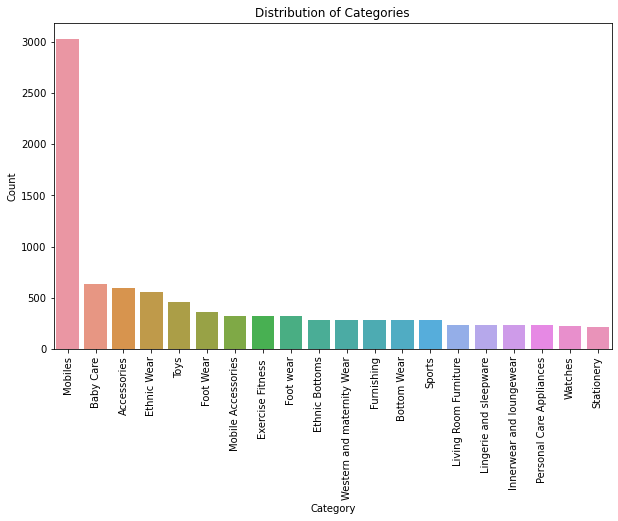

In [53]:
# Plot top 20 category_2 distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category_2', data=merged_df, order=merged_df.category_2.value_counts().index[:20])
plt.title('Distribution of Categories')
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [56]:
merged_df['category_3'].value_counts()

SAMSUNG                  696
Apple                    369
realme                   294
OPPO                     260
Nokia                    209
                        ... 
External Hard Disks        5
DSLR and Mirrorless        5
Headphones & Headsets      5
Apple Ipads                5
IQOO                       5
Name: category_3, Length: 317, dtype: int64

In [58]:
# Top 10 category 2 distribution
category_counts = merged_df['category_2'].value_counts().sort_values(ascending=False)
top_10_category = category_counts.head(10)  # Select top 10 category
top_10_category

Mobiles               3032
Baby Care              640
Accessories            600
Ethnic Wear            560
Toys                   458
Foot Wear              360
Mobile Accessories     325
Exercise Fitness       320
Foot wear              320
Ethnic Bottoms         280
Name: category_2, dtype: int64

In [59]:
#list to hold top 5 category 3 and their counts for top 10 category 2
top_5_category_3_per_category_2 = []
# for loop over top 10 category 2
for category in top_10_category.index:
    category_df = merged_df.loc[merged_df['category_2']==category].groupby(['category_3'])['category_3'].count().sort_values(ascending=False)[:5]
    curr_top_5_category = list(category_df.index)
    top_5_value_counts = list(category_df.values)
    top_5_dict = dict(zip(curr_top_5_category, top_5_value_counts))
    top_5_category_3_per_category_2.append({category: top_5_dict})
top_5_category_3_per_category_2

[{'Mobiles': {'SAMSUNG': 696,
   'Apple': 369,
   'realme': 294,
   'OPPO': 260,
   'Nokia': 209}},
 {'Baby Care': {'Wipes ': 40,
   'Nursing and Breast Feeding ': 40,
   'Diapers ': 40,
   'Baby Proofing and Safety ': 40,
   'Baby Oral Care ': 40}},
 {'Accessories': {'Sunglasses ': 80,
   'Luggage and Travel ': 80,
   'Wallets and Belts ': 40,
   'Wallets ': 40,
   'Totes ': 40}},
 {'Ethnic Wear': {'Sherwanis ': 40,
   'Sarees ': 40,
   'Lungi ': 40,
   'Lehenga Choli ': 40,
   'Kurtas and Kurtis ': 40}},
 {'Toys': {'Toy Guns ': 40,
   'Soft Toys ': 40,
   'Remote Control Toys ': 40,
   'Puzzles ': 40,
   'Party Supplies ': 40}},
 {'Foot Wear': {'Sports Shoes ': 40,
   'Sneakers ': 40,
   'Sandals and Floaters ': 40,
   'Running Shoes ': 40,
   'Loafers ': 40}},
 {'Mobile Accessories': {'Smart Headphones': 40,
   'Screenguards': 40,
   'Power Banks': 40,
   'Mobile Holders': 40,
   'Mobile Chargers': 40}},
 {'Exercise Fitness ': {'Yoga Mat ': 40,
   'Support ': 40,
   'Shakers and Sip

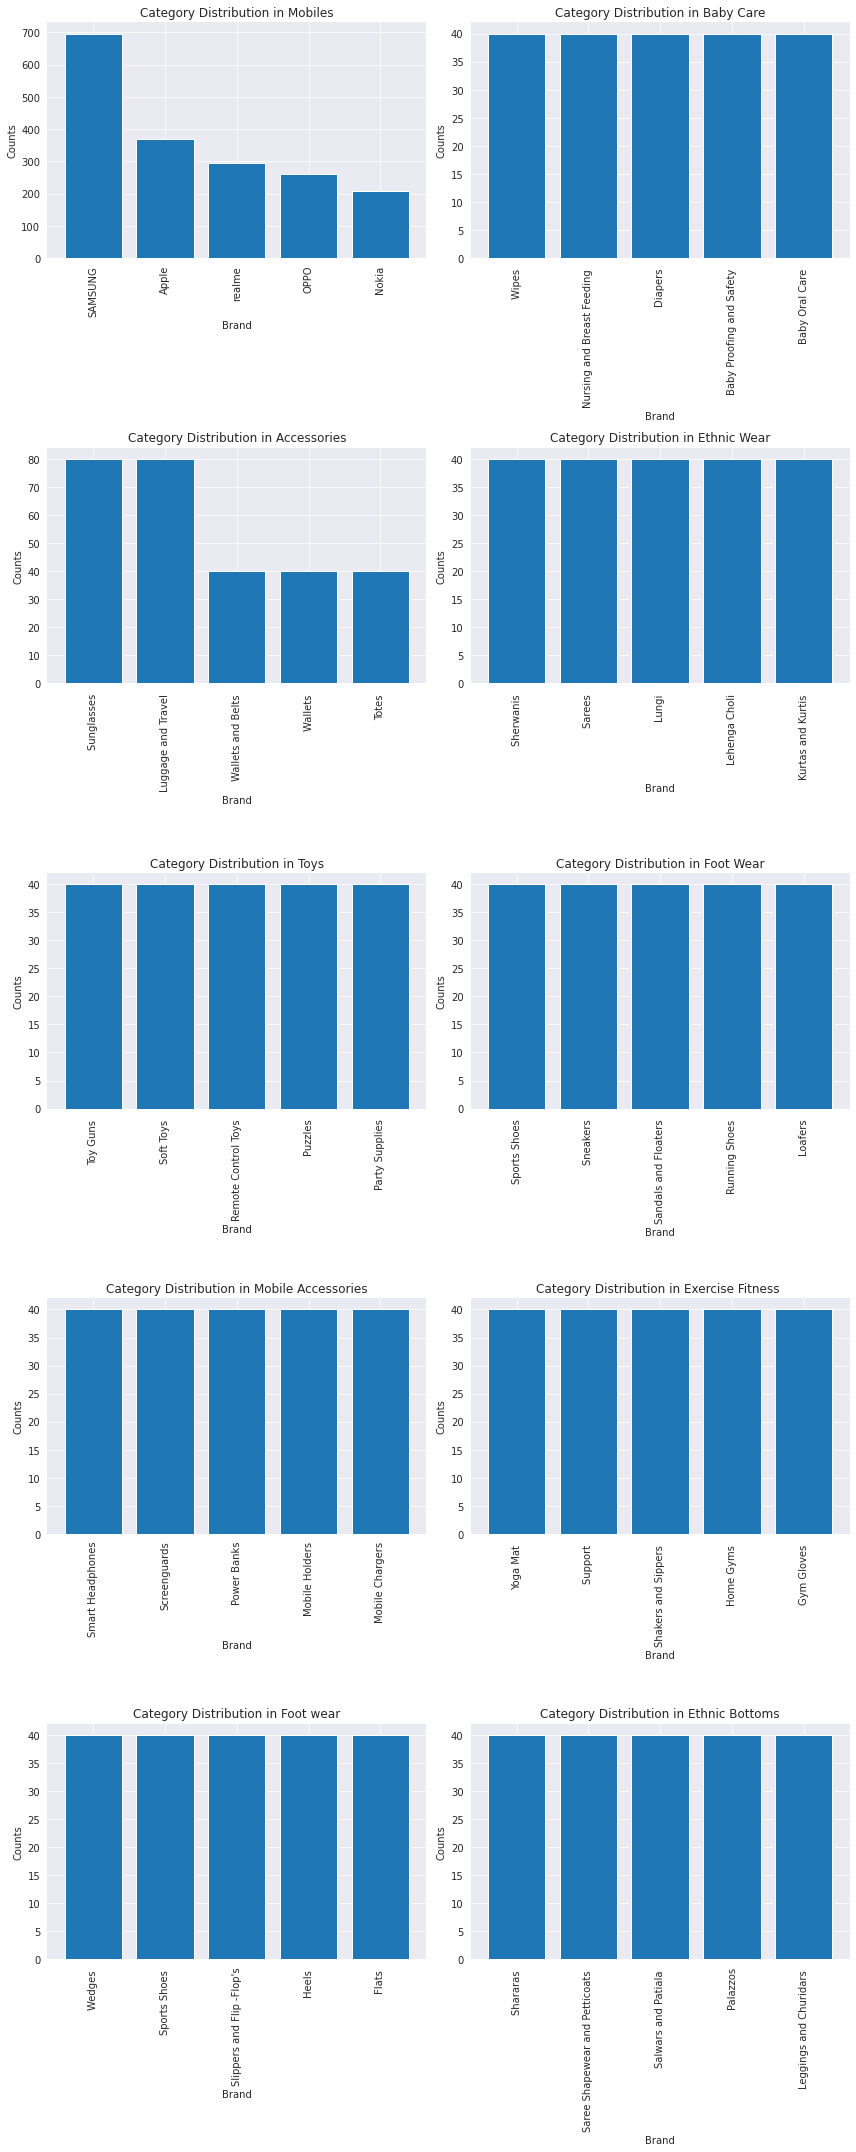

In [60]:
# Setting dark grid
sns.set_style('darkgrid')

# Calculate the number of rows and columns based on the number of bar plots
num_charts = len(top_5_category_3_per_category_2)
num_rows = math.ceil(num_charts / 2)
num_cols = min(num_charts, 2)

# Create subplots with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axs = axs.flatten()  # Flatten the axes array for easier indexing

# Loop over the list of dictionaries and create bar plots
for i, d in enumerate(top_5_category_3_per_category_2):
    # Get the Category name and brand dictionary
    category2, brand = list(d.items())[0]

    # Get the counts and labels for the bar plot
    counts = list(brand.values())
    labels = list(brand.keys())

    # Create the bar plot
    axs[i].bar(labels, counts)
    axs[i].set_title(f'Category Distribution in {category2}')
    axs[i].set_xlabel('Brand')
    axs[i].set_ylabel('Counts')
    axs[i].tick_params(axis='x', rotation=90)
    sns.despine(left=True, bottom=True)

# Remove any empty subplots if the number of charts is not a multiple of 2
if num_charts % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

<ipython-input-61-799a81d1076c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['product_rating'] = merged_df['product_rating'].astype("float")


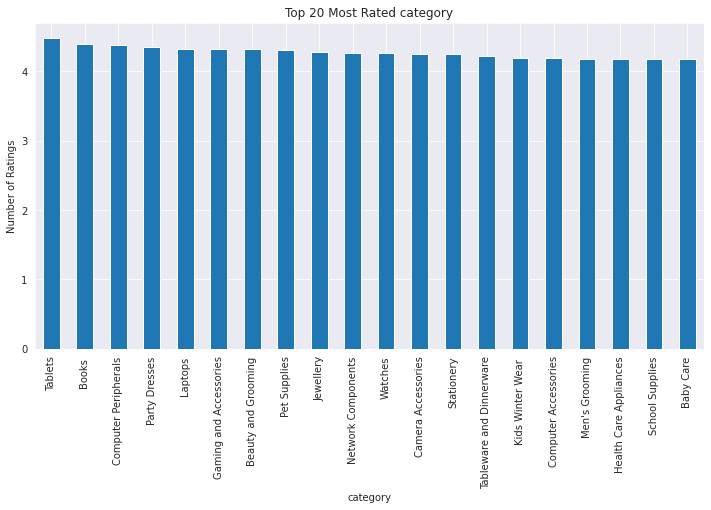

In [61]:
merged_df['product_rating'] = merged_df['product_rating'].astype("float")

# Count ratings per category 2
top_rated_category = merged_df.groupby('category_2')['product_rating'].mean().sort_values(ascending=False)[:20]

# Plot top 20 rated Category 2
plt.figure(figsize=(12, 6))
top_rated_category.plot(kind='bar')
plt.title('Top 20 Most Rated category')
plt.xlabel('category')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

In [62]:
#list to hold top 5 category 3 prices for each category 2
top_5_category_3_per_category_2 = []
# for loop over top 10 Category 2
for category in top_10_category.index:
    category_df = merged_df.loc[merged_df['category_2']==category].groupby(['category_3'])['selling_price(KSH.)'].mean().sort_values(ascending=False)[:5]
    curr_top_5_category = list(category_df.index)
    top_5_value_counts = list(category_df.values)
    top_5_dict = dict(zip(curr_top_5_category, top_5_value_counts))
    top_5_category_3_per_category_2.append({category: top_5_dict})
top_5_category_3_per_category_2

[{'Mobiles': {'Apple': 80001.66124661246,
   'Google': 61391.862068965514,
   'IQOO': 37190.0,
   'HTC': 28314.381818181817,
   'SAMSUNG': 25035.25}},
 {'Baby Care': {'Baby Gear ': 1213.1499999999999,
   'Baby Bathing Accessories ': 700.0740000000002,
   'Diapers ': 568.1380000000001,
   'Baby Medical and Health Care ': 551.95,
   'Nursing and Breast Feeding ': 491.6250000000001}},
 {'Accessories': {'Luggage and Travel ': 2280.8264999999988,
   'Frames': 710.1440000000001,
   'Frames ': 610.3180000000002,
   'Backpacks ': 569.1450000000003,
   'Totes ': 515.0519999999999}},
 {'Ethnic Wear': {'Sherwanis ': 1583.802,
   'Ethnic Sets ': 594.0730000000001,
   'Kurta Sets and Salwar Suits ': 536.826,
   'Lehenga Choli ': 515.4130000000001,
   'Dhoti ': 451.2880000000001}},
 {'Toys': {'Helicopter and Drones ': 2145.6066666666666,
   'Outdoor Toys ': 1982.6119999999992,
   'Dolls and Doll Houses ': 523.222,
   'Musical Toys ': 480.28200000000015,
   'Remote Control Toys ': 474.221}},
 {'Foot 

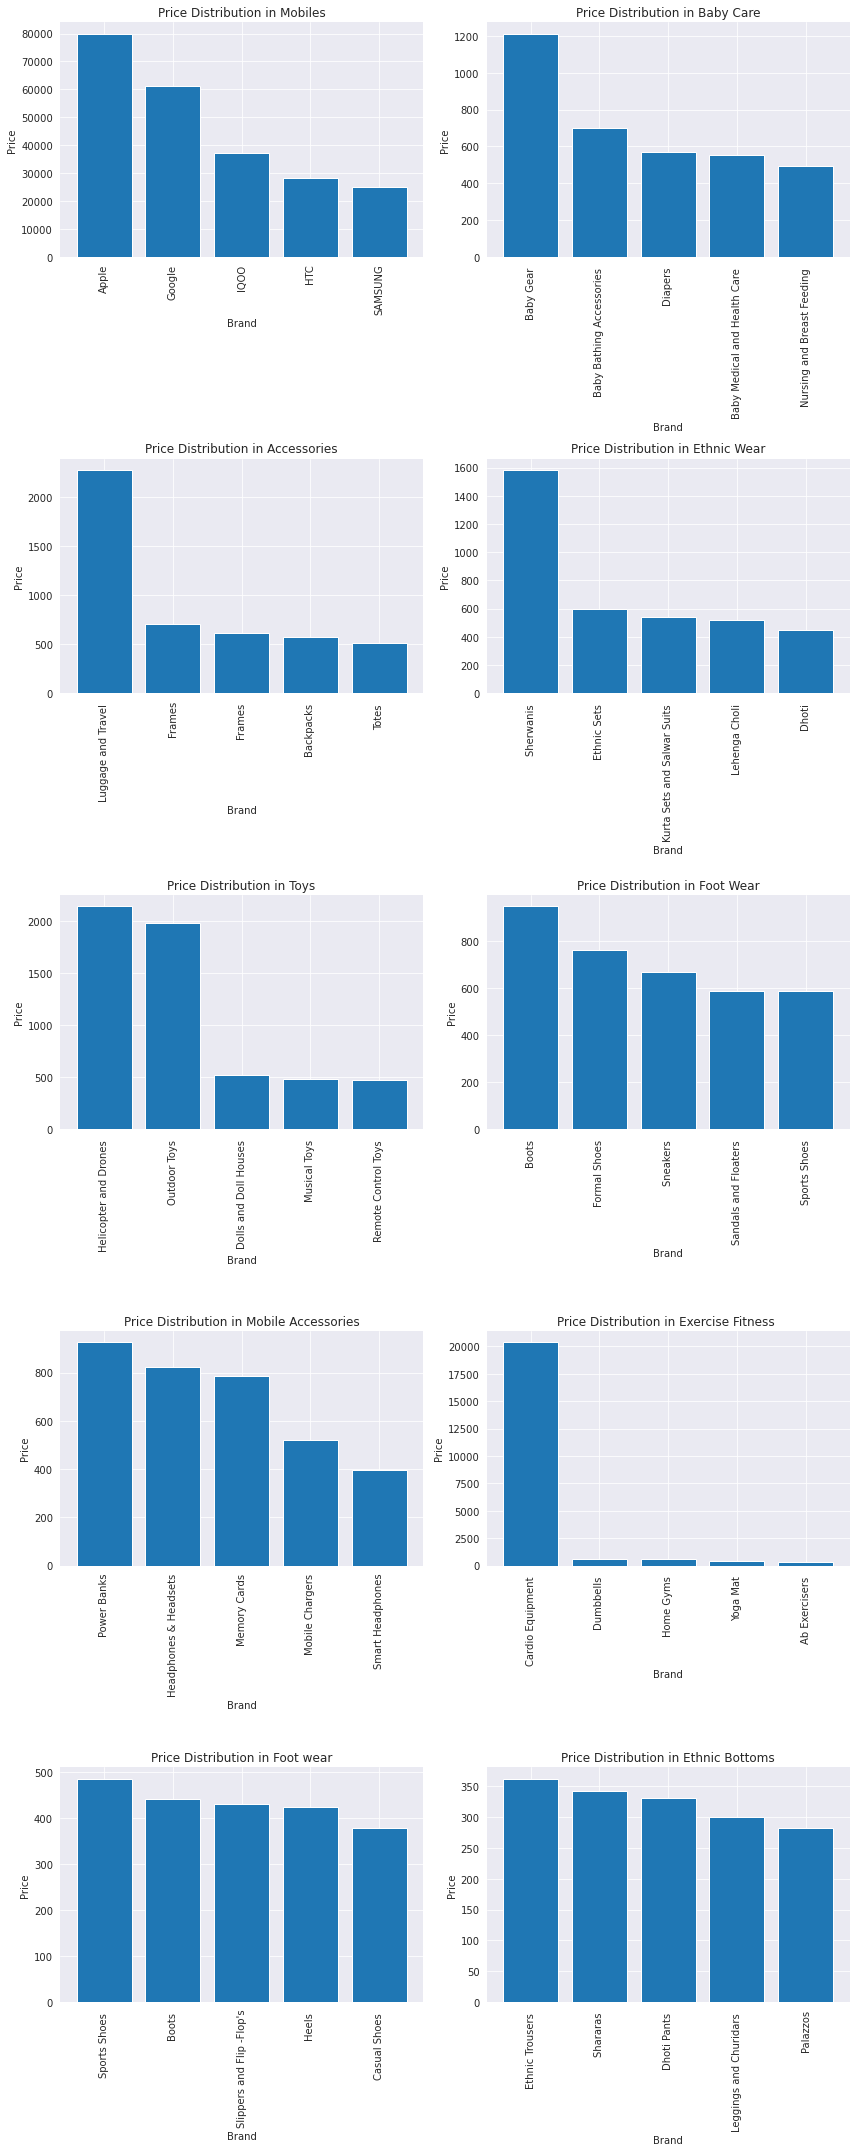

In [64]:
# Setting dark grid
sns.set_style('darkgrid')

# Calculate the number of rows and columns based on the number of bar plots
num_charts = len(top_5_category_3_per_category_2)
num_rows = math.ceil(num_charts / 2)
num_cols = min(num_charts, 2)

# Create subplots with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axs = axs.flatten() 

# Loop over the list of dictionaries and create bar plots
for i, d in enumerate(top_5_category_3_per_category_2):
    # Get the Category name and brands dictionary
    category2, brand = list(d.items())[0]

    # Get the counts and labels for the bar plot
    counts = list(brand.values())
    labels = list(brand.keys())

    # Create the bar plot
    axs[i].bar(labels, counts)
    axs[i].set_title(f'Price Distribution in {category2}')
    axs[i].set_xlabel('Brand')
    axs[i].set_ylabel('Price')
    axs[i].tick_params(axis='x', rotation=90)
    sns.despine(left=True, bottom=True)

# Remove any empty subplots if the number of charts is not a multiple of 2
if num_charts % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()